In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('multiple_linear_regression.csv')

In [3]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
out='Target'

## defining input

In [6]:
x=data.iloc[:,data.columns!=out]

In [7]:
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [11]:
y=data.iloc[:,data.columns==out]

In [13]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=43)

In [14]:
x_train.head()

,Feature 1,Feature 2,Feature 3
71,109.8,14.3,31.7
90,134.3,4.9,9.3
100,222.4,4.3,49.8
44,25.1,25.7,43.3
94,107.4,14.0,10.9


In [15]:
from sklearn.linear_model import LinearRegression as ll

In [16]:
lr=ll()

In [17]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lr.coef_

array([[ 0.0459782 ,  0.18092867, -0.00194226]])

In [19]:
lr.intercept_

array([3.0777745])

In [20]:
prediction=lr.predict(x_test)

In [22]:
from sklearn.metrics import mean_squared_error as err

cost=err(prediction,y_test)

In [23]:
cost

2.2412862530933477

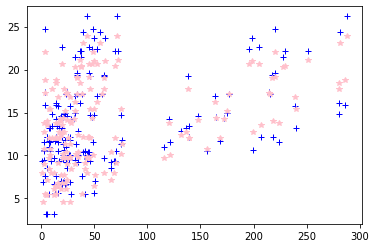

In [25]:
plt.plot(x_test,y_test,'+',color='blue')
plt.plot(x_test,prediction,'*',color='pink')

plt.show()

# OLS Summary Concept

In [26]:

import statsmodels.api as sm
import statsmodels.tsa.api as smt


In [28]:
xc=sm.add_constant(x_train)

In [29]:
xc.head()

,const,Feature 1,Feature 2,Feature 3
71,1.0,109.8,14.3,31.7
90,1.0,134.3,4.9,9.3
100,1.0,222.4,4.3,49.8
44,1.0,25.1,25.7,43.3
94,1.0,107.4,14.0,10.9


In [30]:
#ordinary least square

model=sm.OLS(y_train,xc)

In [31]:
result=model.fit()

In [33]:
result.params

const        3.077774
Feature 1    0.045978
Feature 2    0.180929
Feature 3   -0.001942
dtype: float64

In [34]:
 print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     346.9
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           1.67e-63
Time:                        20:30:24   Log-Likelihood:                -276.47
No. Observations:                 140   AIC:                             560.9
Df Residuals:                     136   BIC:                             572.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0778      0.398      7.735      0.0

In [35]:
x_test.shape

(60, 3)

In [36]:
x_test=sm.add_constant(x_test)

In [41]:
x_test.shape
x_test.head()

,const,Feature 1,Feature 2,Feature 3
56,1.0,7.3,28.1,41.4
37,1.0,74.7,49.4,45.7
67,1.0,139.3,14.5,10.2
79,1.0,116.0,7.7,23.1
80,1.0,76.4,26.7,22.3


In [46]:
y_pred=result.predict(x_test)

In [47]:
residual = y_test-y_pred

In [48]:
residual

,0,1,2,9,10,11,12,15,17,19,...,171,173,180,181,183,185,188,189,195,Target
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ValueError: x and y must be the same size

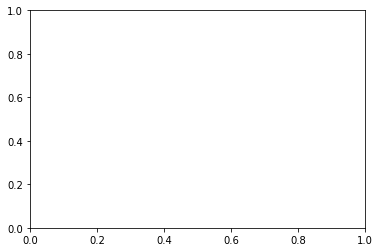

In [45]:
plt.scatter(p,residual)